In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
import math

In [9]:
path = '/Users/HP Spectre/OneDrive - student.kit.edu/uni/Master/Lissabon Kurse/Intelligent Systems/IntSysGroup6/'

data = pd.read_csv(path+'Project/data/robot_inverse_kinematics_dataset.csv')
X = data.iloc[:,6:].to_numpy()
y = data.iloc[:,0:6].to_numpy()
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

(15000, 6)


In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(3, 1), return_sequences=True)) 

model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LSTM(256,return_sequences=True))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LSTM(64))

model.add(tf.keras.layers.Dense(6))

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0001))

In [11]:
history = model.fit(
          X_train,
          y_train,
          validation_split=0.2,
          verbose=1,
          epochs=50)

Epoch 1/50
300/300 [==============================] - 23s 42ms/step - loss: 0.1393 - val_loss: 0.0857
Epoch 2/50
300/300 [==============================] - 11s 37ms/step - loss: 0.0839 - val_loss: 0.0852
Epoch 3/50
300/300 [==============================] - 9s 30ms/step - loss: 0.0836 - val_loss: 0.0849
Epoch 4/50
300/300 [==============================] - 9s 30ms/step - loss: 0.0834 - val_loss: 0.0847
Epoch 5/50
300/300 [==============================] - 10s 32ms/step - loss: 0.0833 - val_loss: 0.0846
Epoch 6/50
300/300 [==============================] - 12s 41ms/step - loss: 0.0833 - val_loss: 0.0847
Epoch 7/50
300/300 [==============================] - 11s 37ms/step - loss: 0.0833 - val_loss: 0.0847
Epoch 8/50
300/300 [==============================] - 10s 33ms/step - loss: 0.0833 - val_loss: 0.0847
Epoch 9/50
300/300 [==============================] - 11s 35ms/step - loss: 0.0833 - val_loss: 0.0846
Epoch 10/50
300/300 [==============================] - 10s 35ms/step - loss: 0.0832 

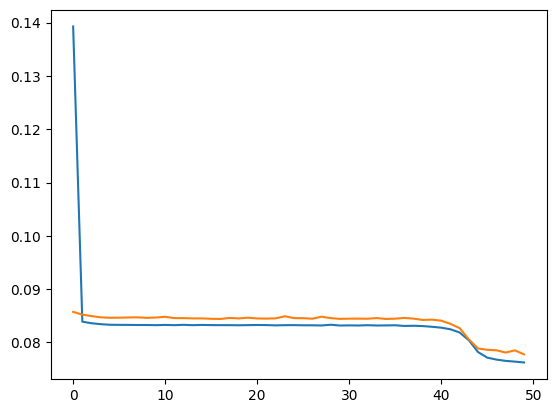

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [13]:
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
y_pred = scaler_Y.inverse_transform(y_pred)
y_test = scaler_Y.inverse_transform(y_test)
print(math.degrees(mean_absolute_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2*100)

plt.show()

94/94 [==============================] - 4s 11ms/step
0.23647844344714727
60.331075739403424
R-squared (R2) Score: 8.2067957685262
